<a href="https://colab.research.google.com/github/jjlopezre/PDS/blob/main/7recursivefilters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Realization of Recursive Filters

*This jupyter notebook is part of a [collection of notebooks](../index.ipynb) on various topics of Digital Signal Processing. Please direct questions and suggestions to [Sascha.Spors@uni-rostock.de](mailto:Sascha.Spors@uni-rostock.de).*

## Introduction

Computing the output $y[k] = \mathcal{H} \{ x[k] \}$ of a [linear time-invariant](https://en.wikipedia.org/wiki/LTI_system_theory) (LTI) system is of central importance in digital signal processing. This is often referred to as [*filtering*](https://en.wikipedia.org/wiki/Digital_filter) of the input signal $x[k]$. We already have discussed the realization of [non-recursive filters](../nonrecursive_filters/introduction.ipynb). This section focuses on the realization of recursive filters.

### Recursive Filters

Linear difference equations with constant coefficients represent linear time-invariant (LTI) systems

\begin{equation}
\sum_{n=0}^{N} a_n \; y[k-n] = \sum_{m=0}^{M} b_m \; x[k-m]
\end{equation}

where $y[k] = \mathcal{H} \{ x[k] \}$ denotes the response of the system to the input signal $x[k]$, $N$ the order, $a_n$ and $b_m$ constant coefficients, respectively. Above equation can be rearranged with respect to the output signal $y[k]$ by extracting the first element ($n=0$) of the left-hand sum

\begin{equation}
y[k] = \frac{1}{a_0} \left( \sum_{m=0}^{M} b_m \; x[k-m] - \sum_{n=1}^{N} a_n \; y[k-n] \right)
\end{equation}

It is evident that the output signal $y[k]$ at time instant $k$ is given as a linear combination of past output samples $y[k-n]$ superimposed by a linear combination of the actual $x[k]$ and past $x[k-m]$ input samples. Hence, the actual output $y[k]$ is composed from the two contributions

1. a [non-recursive part](../nonrecursive_filters/introduction.ipynb#Non-Recursive-Filters), and
2. a recursive part where a linear combination of past output samples is fed back.

The impulse response of the system is given as the response of the system to a Dirac impulse at the input $h[k] = \mathcal{H} \{ \delta[k] \}$. Using above result and the properties of the discrete Dirac impulse we get

\begin{equation}
h[k] = \frac{1}{a_0} \left( b_k  - \sum_{n=1}^{N} a_n \; h[k-n] \right)
\end{equation}

Due to the feedback, the impulse response will in general be of infinite length. The impulse response is termed as [infinite impulse response](https://en.wikipedia.org/wiki/Infinite_impulse_response) (IIR) and the system as recursive system/filter.

### Transfer Function

Applying a $z$-transform to the left- and right-hand side of the difference equation and rearranging terms yields the transfer function $H(z)$ of the system

\begin{equation}
H(z) = \frac{Y(z)}{X(z)} = \frac{\sum_{m=0}^{M} b_m \; z^{-m}}{\sum_{n=0}^{N} a_n \; z^{-n}}
\end{equation}

The transfer function is given as a [rational function](https://en.wikipedia.org/wiki/Rational_function) in $z$. The polynominals of the numerator and denominator can be expressed alternatively by their roots as

\begin{equation}
H(z) = \frac{b_M}{a_N} \cdot \frac{\prod_{\mu=1}^{P} (z - z_{0\mu})^{m_\mu}}{\prod_{\nu=1}^{Q} (z - z_{\infty\nu})^{n_\nu}}
\end{equation}

where $z_{0\mu}$ and $z_{\infty\nu}$ denote the $\mu$-th zero and $\nu$-th pole of degree $m_\mu$ and $n_\nu$ of $H(z)$, respectively. The total number of zeros and poles is denoted by $P$ and $Q$. Due to the symmetries of the $z$-transform, the transfer function of a real-valued system $h[k] \in \mathbb{R}$ exhibits complex conjugate symmetry

\begin{equation}
H(z) = H^*(z^*)
\end{equation}

Poles and zeros are either real valued or complex conjugate pairs for real-valued systems ($b_m\in\mathbb{R}$, $a_n\in\mathbb{R}$). For the poles of a causal and stable system $H(z)$ the following condition has to hold

\begin{equation}
\max_{\nu} | z_{\infty\nu} | < 1
\end{equation}

Hence, all poles have to be located inside the unit circle $|z| = 1$. Amongst others, this implies that $M \leq N$.

### Example

The following example shows the pole/zero diagram, the magnitude and phase response, and impulse response of a recursive filter with so-called [Butterworth](https://en.wikipedia.org/wiki/Butterworth_filter) lowpass characteristic.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


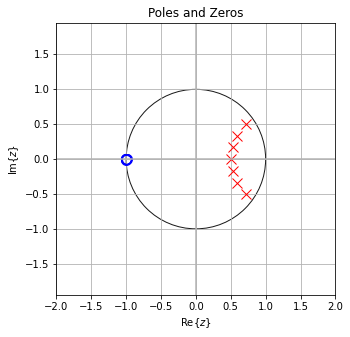

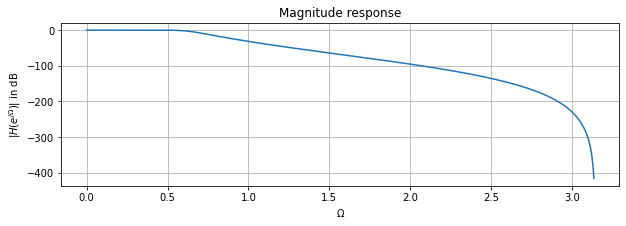

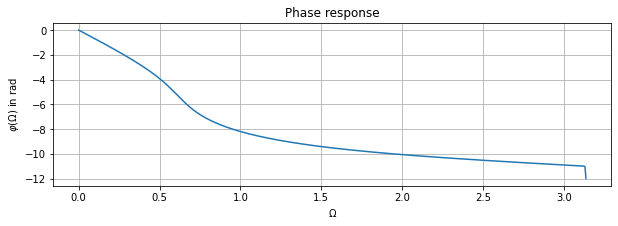

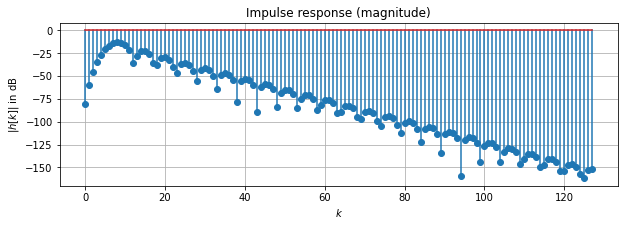

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.markers import MarkerStyle
from matplotlib.patches import Circle
import scipy.signal as sig

N = 7  # order of recursive filter
L = 128  # number of computed samples


def zplane(z, p, title='Poles and Zeros'):
    "Plots zero and pole locations in the complex z-plane"
    ax = plt.gca()
    
    ax.plot(np.real(z), np.imag(z), 'bo', fillstyle='none', ms = 10)
    ax.plot(np.real(p), np.imag(p), 'rx', fillstyle='none', ms = 10)
    unit_circle = Circle((0,0), radius=1, fill=False,
                         color='black', ls='solid', alpha=0.9)
    ax.add_patch(unit_circle)
    ax.axvline(0, color='0.7')
    ax.axhline(0, color='0.7')
    
    plt.title(title)
    plt.xlabel(r'Re{$z$}')
    plt.ylabel(r'Im{$z$}')
    plt.axis('equal')
    plt.xlim((-2, 2))
    plt.ylim((-2, 2))
    plt.grid()


# compute coefficients of recursive filter
b, a = sig.butter(N, 0.2, 'low')
# compute transfer function
Om, H = sig.freqz(b, a)
# compute impulse response
k = np.arange(L)
x = np.where(k==0, 1.0, 0)
h = sig.lfilter(b, a, x)

# plot pole/zero-diagram
plt.figure(figsize=(5, 5))
zplane(np.roots(b), np.roots(a))
# plot magnitude response
plt.figure(figsize=(10, 3))
plt.plot(Om, 20 * np.log10(abs(H)))
plt.xlabel(r'$\Omega$')
plt.ylabel(r'$|H(e^{j \Omega})|$ in dB')
plt.grid()
plt.title('Magnitude response')
# plot phase response
plt.figure(figsize=(10, 3))
plt.plot(Om, np.unwrap(np.angle(H)))
plt.xlabel(r'$\Omega$')
plt.ylabel(r'$\varphi (\Omega)$ in rad')
plt.grid()
plt.title('Phase response')
# plot impulse response (magnitude)
plt.figure(figsize=(10, 3))
plt.stem(20*np.log10(np.abs(np.squeeze(h))))
plt.xlabel(r'$k$')
plt.ylabel(r'$|h[k]|$ in dB')
plt.grid()
plt.title('Impulse response (magnitude)');

**Exercise**

* Does the system have an IIR?
* What happens if you increase the order `N` of the filter?

Solution: It can be concluded from the last illustration, showing the magnitude of the impulse response $|h[k]|$ on a logarithmic scale, that the magnitude of the impulse response decays continuously for increasing $k$ but does not become zero at some point. This behavior continues with increasing $k$ as can be observed when increasing the number `L` of computed samples in above example. The magnitude response $|H(e^{j \Omega})|$ of the filter decays faster with increasing order `N` of the filter.

**Exercise**

* Does the system have an IIR?
* What happens if you increase the order `N` of the filter?

**Solution**
- Yes, because after analyze the magnitude impulse response it's possible conclude that the output doesn't return to the rest when increasing $k$. 
- When I increase the order `N` of the filter the magnitude of the impulse response, I analized that the Higher order filters provided greater roll off rates.

**Juan Jose Lopez Rendon**

**Copyright**

This notebook is provided as [Open Educational Resource](https://en.wikipedia.org/wiki/Open_educational_resources). Feel free to use the notebook for your own purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Sascha Spors, Digital Signal Processing - Lecture notes featuring computational examples, 2016-2018*.